Nachdem jeder von uns eine lineare Regression über 2 Warengruppen berechnet hat und bereits mit der richtigen id zum hochkaden versehen hat werden diese files nun hier zusammen geführt. Die finale datei kann dann bei kaggle hochgeladen werden.

In [10]:
import pandas as pd
import numpy as np

die csv Dateien hier stammen aus Julius --> 04_SGD_optimized

MAPEs für Validerungsdaten in %:
Brot: 18.49
Brötchen: 11.08
Croissant: 18.23
Konditorei: 21.42
Kuchen: 13.88
Saisonbrot: 35.9

händisch berechneter Gesamt-MAPE aus diesen Daten: 

In [11]:
#load the data
#Warengruppe_1 = Brot
df_1 = pd.read_csv('./Brot_Umsatzvorhersage.csv')
print(df_1.head())

#Warengruppe_2 = Brötchen
df_2 = pd.read_csv('./Broetchen_Umsatzvorhersage.csv')
print(df_2.head())

#Warengruppe_3 = Croissants
df_3 = pd.read_csv('./Croissant_Umsatzvorhersage.csv')
print(df_3.head())

#Warengruppe_4 = Konditorei
df_4 = pd.read_csv('./Konditorei_Umsatzvorhersage.csv')
print(df_4.head())

#Warengruppe_5 = Kuchen
df_5 = pd.read_csv('./Kuchen_Umsatzvorhersage.csv')
print(df_5.head())

#Warengruppe_6 = Saisonbrot
df_6 = pd.read_csv('./Saisonbrot_Umsatzvorhersage.csv')
print(df_6.head())

        id      Umsatz
0  1808011  137.548320
1  1808021  145.538390
2  1808031  141.234560
3  1808041  156.745910
4  1808051   92.342285
        id     Umsatz
0  1808012  503.71875
1  1808022  517.77277
2  1808032  517.77277
3  1808042  657.58190
4  1808052  619.76400
        id     Umsatz
0  1808013  265.32822
1  1808023  285.43234
2  1808033  285.43234
3  1808043  351.02136
4  1808053  306.70966
        id      Umsatz
0  1808014   76.831870
1  1808024   73.059330
2  1808034   75.664490
3  1808044   80.415146
4  1808054  113.536010
        id     Umsatz
0  1808015  292.72590
1  1808025  270.06607
2  1808035  285.06970
3  1808045  303.32867
4  1808055  310.78870
        id     Umsatz
0  1811016  38.907680
1  1811026  37.167587
2  1811036  59.877872
3  1811046  44.608414
4  1811056  41.665302


In [12]:
#concatenate the data
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
print(df.head())
print(df.tail())

print(df.shape)

        id      Umsatz
0  1808011  137.548320
1  1808021  145.538390
2  1808031  141.234560
3  1808041  156.745910
4  1808051   92.342285
         id     Umsatz
51  1812226  85.022680
52  1812236  80.048120
53  1812246  55.907703
54  1812276  46.886196
55  1812286  46.886196
(1830, 2)


In [13]:
#als kontrolle einmal die samplesubmission einlesen
df_sample = pd.read_csv('./sample_submission.csv')
print(df_sample.head())
print(df_sample.tail())
print(df_sample.shape)

        id  Umsatz
0  1808011       0
1  1808021       0
2  1808031       0
3  1808041       0
4  1808051       0
           id  Umsatz
1825  1812226       0
1826  1812236       0
1827  1812246       0
1828  1812276       0
1829  1812286       0
(1830, 2)


In [14]:
#export the data
df.to_csv('./Umsatzvorhersage_Team12.csv', index=False)

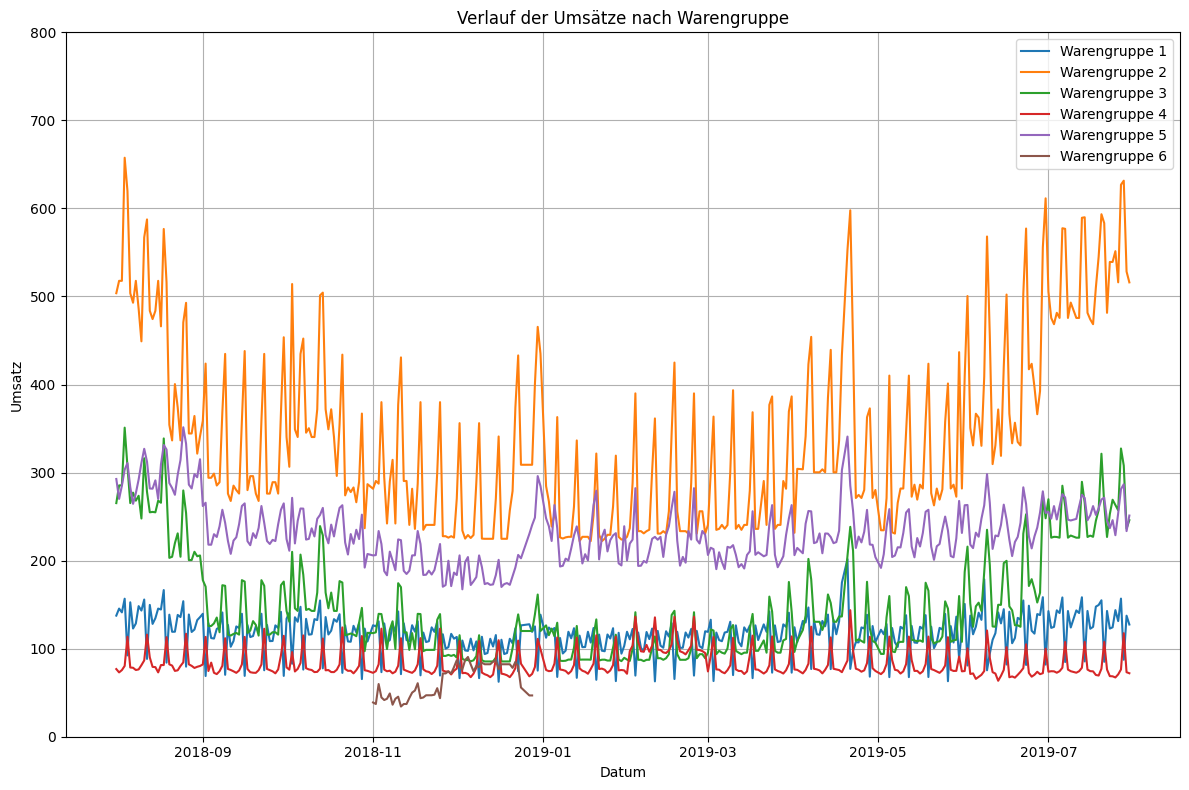

In [15]:
#Kontrollplot
import matplotlib.pyplot as plt
# Extrahieren des Datums und der Warengruppe aus der ID
df['Datum'] = pd.to_datetime(df['id'] // 10, format='%y%m%d')
df['Warengruppe'] = df['id'] % 10

# Erstellen eines Plots für jede Warengruppe
plt.figure(figsize=(12, 8))

for warengruppe in sorted(df['Warengruppe'].unique()):
    gruppen_data = df[df['Warengruppe'] == warengruppe]
    plt.plot(gruppen_data['Datum'], gruppen_data['Umsatz'], label=f'Warengruppe {warengruppe}')

plt.title('Verlauf der Umsätze nach Warengruppe')
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.ylim(0, 800)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [16]:
#sind eventuell bei irgendwelchen Features im Testzeitraum alle Werte 0?#
import pandas as pd

Testdaten_lag = pd.read_csv("../../0_DataPreparation/00_data/data_with_lag/Testdaten_with_lag.csv")
Testdaten = pd.read_csv("../../0_DataPreparation/00_data/Testdaten.csv")

# Überprüfen, ob Spalten komplett aus Nullen bestehen
columns_with_only_zeros_l = Testdaten_lag.columns[(Testdaten_lag == 0).all()]

print("Spalten, die komplett aus Nullen bestehen:", list(columns_with_only_zeros_l))

columns_with_only_zeros = Testdaten.columns[(Testdaten == 0).all()]

print("Spalten, die komplett aus Nullen bestehen:", list(columns_with_only_zeros))


Spalten, die komplett aus Nullen bestehen: []
Spalten, die komplett aus Nullen bestehen: []


In [17]:
# Stimmen Spalten und Zeilenanzahl der submission csv mit der erstellten csv überein? --> ja

import csv

# Pfad zur CSV-Datei
csv_datei = './sample_submission.csv'

# Zeilen- und Spaltenanzahl initialisieren
zeilenanzahl = 0
spaltenanzahl = 0

with open(csv_datei, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for zeile in reader:
        zeilenanzahl += 1
        if zeilenanzahl == 1:  # Spaltenanzahl basierend auf der ersten Zeile bestimmen
            spaltenanzahl = len(zeile)

print("Submission csv:")
print(f"Zeilenanzahl: {zeilenanzahl}")
print(f"Spaltenanzahl: {spaltenanzahl}")


Submission csv:
Zeilenanzahl: 1831
Spaltenanzahl: 2


In [18]:
import csv

# Pfad zur CSV-Datei
csv_datei = './Umsatzvorhersage_Team12.csv'

# Zeilen- und Spaltenanzahl initialisieren
zeilenanzahl = 0
spaltenanzahl = 0

with open(csv_datei, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for zeile in reader:
        zeilenanzahl += 1
        if zeilenanzahl == 1:  # Spaltenanzahl basierend auf der ersten Zeile bestimmen
            spaltenanzahl = len(zeile)

print("erstellte Submission csv:")
print(f"Zeilenanzahl: {zeilenanzahl}")
print(f"Spaltenanzahl: {spaltenanzahl}")

erstellte Submission csv:
Zeilenanzahl: 1831
Spaltenanzahl: 2
